# <center>Analysis in PlantDoc Dataset

Here we have we tryed various models like: VGG16, Xception, Inception, ResNet, MoblieNet for prediction and detection of plant diseases using PlantDoc dataset.

**IMPORTING THE DATASET**

In [ ]:
!git clone https://github.com/pratikkayal/PlantDoc-Dataset.git

Cloning into 'PlantDoc-Dataset'...
remote: Enumerating objects: 2670, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 2670 (delta 24), reused 0 (delta 0), pack-reused 2628
Receiving objects: 100% (2670/2670), 932.92 MiB | 21.57 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Checking out files: 100% (2581/2581), done.


In [ ]:
pwd

'/content'

In [ ]:
import shutil
shutil.rmtree("/content/PlantDoc-Dataset/train/Tomato two spotted spider mites leaf")

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

**SPLITTING DATA INTO TRAINING AND VALIDATION**

In [ ]:
traindir = "/content/PlantDoc-Dataset/train"
validdir = "/content/PlantDoc-Dataset/test"

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

batch_size = 128
training_set = train_datagen.flow_from_directory(traindir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

Found 2340 images belonging to 27 classes.
Found 236 images belonging to 27 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple Scab Leaf': 0, 'Apple leaf': 1, 'Apple rust leaf': 2, 'Bell_pepper leaf': 3, 'Bell_pepper leaf spot': 4, 'Blueberry leaf': 5, 'Cherry leaf': 6, 'Corn Gray leaf spot': 7, 'Corn leaf blight': 8, 'Corn rust leaf': 9, 'Peach leaf': 10, 'Potato leaf early blight': 11, 'Potato leaf late blight': 12, 'Raspberry leaf': 13, 'Soyabean leaf': 14, 'Squash Powdery mildew leaf': 15, 'Strawberry leaf': 16, 'Tomato Early blight leaf': 17, 'Tomato Septoria leaf spot': 18, 'Tomato leaf': 19, 'Tomato leaf bacterial spot': 20, 'Tomato leaf late blight': 21, 'Tomato leaf mosaic virus': 22, 'Tomato leaf yellow virus': 23, 'Tomato mold leaf': 24, 'grape leaf': 25, 'grape leaf black rot': 26}


In [ ]:
cls_dict = valid_set.class_indices
print(cls_dict)

{'Apple Scab Leaf': 0, 'Apple leaf': 1, 'Apple rust leaf': 2, 'Bell_pepper leaf': 3, 'Bell_pepper leaf spot': 4, 'Blueberry leaf': 5, 'Cherry leaf': 6, 'Corn Gray leaf spot': 7, 'Corn leaf blight': 8, 'Corn rust leaf': 9, 'Peach leaf': 10, 'Potato leaf early blight': 11, 'Potato leaf late blight': 12, 'Raspberry leaf': 13, 'Soyabean leaf': 14, 'Squash Powdery mildew leaf': 15, 'Strawberry leaf': 16, 'Tomato Early blight leaf': 17, 'Tomato Septoria leaf spot': 18, 'Tomato leaf': 19, 'Tomato leaf bacterial spot': 20, 'Tomato leaf late blight': 21, 'Tomato leaf mosaic virus': 22, 'Tomato leaf yellow virus': 23, 'Tomato mold leaf': 24, 'grape leaf': 25, 'grape leaf black rot': 26}


In [ ]:
li = list(class_dict.keys())
print(li)

['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'grape leaf', 'grape leaf black rot']


In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(27, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      training_set,
      steps_per_epoch=train_num//batch_size,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=valid_set,
      validation_steps=valid_num//batch_size) # 1000 images = batch_size * steps

Epoch 1/10
18/18 [==============================] - 98s 5s/step - loss: 0.1634 - accuracy: 0.0570 - val_loss: 0.1667 - val_accuracy: 0.0625
Epoch 2/10
18/18 [==============================] - 95s 5s/step - loss: 0.1629 - accuracy: 0.0705 - val_loss: 0.1697 - val_accuracy: 0.1016
Epoch 3/10
18/18 [==============================] - 94s 5s/step - loss: 0.1613 - accuracy: 0.0972 - val_loss: 0.1646 - val_accuracy: 0.0547
Epoch 4/10
18/18 [==============================] - 94s 5s/step - loss: 0.1599 - accuracy: 0.0850 - val_loss: 0.1664 - val_accuracy: 0.0859
Epoch 5/10
18/18 [==============================] - 93s 5s/step - loss: 0.1579 - accuracy: 0.0891 - val_loss: 0.1599 - val_accuracy: 0.1016
Epoch 6/10
18/18 [==============================] - 93s 5s/step - loss: 0.1570 - accuracy: 0.1058 - val_loss: 0.1623 - val_accuracy: 0.0703
Epoch 7/10
18/18 [==============================] - 93s 5s/step - loss: 0.1559 - accuracy: 0.1058 - val_loss: 0.1618 - val_accuracy: 0.0625
Epoch 8/10
18/18 [==

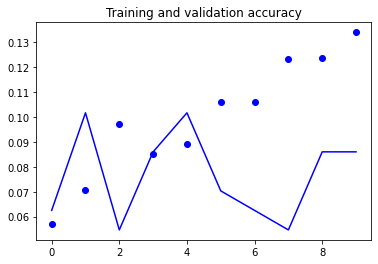

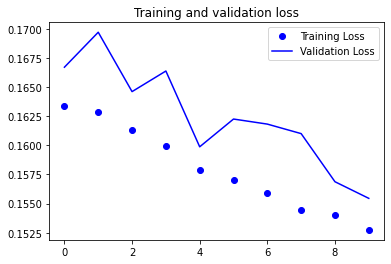

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# VGG16 Model

**INITIALIZING THE BASE MODEL: VGG16**

In [ ]:
base_model=VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

58892288/58889256 [==============================] - 1s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(27,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 27)                677403    
Total params: 15,392,091
Trainable params: 677,403
Non-trainable params: 14,714,688
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=6, validation_steps=valid_num//batch_size)

Epoch 1/6
18/18 [==============================] - 135s 5s/step - loss: 3.7236 - accuracy: 0.1120 - val_loss: 2.7139 - val_accuracy: 0.2578
Epoch 2/6
18/18 [==============================] - 84s 5s/step - loss: 2.3449 - accuracy: 0.3418 - val_loss: 2.3759 - val_accuracy: 0.3125
Epoch 3/6
18/18 [==============================] - 83s 5s/step - loss: 1.9525 - accuracy: 0.4136 - val_loss: 2.1747 - val_accuracy: 0.3281
Epoch 4/6
18/18 [==============================] - 83s 5s/step - loss: 1.6795 - accuracy: 0.4993 - val_loss: 2.2431 - val_accuracy: 0.3750
Epoch 5/6
18/18 [==============================] - 84s 5s/step - loss: 1.5696 - accuracy: 0.5397 - val_loss: 2.1460 - val_accuracy: 0.3828
Epoch 6/6
18/18 [==============================] - 84s 5s/step - loss: 1.3749 - accuracy: 0.5775 - val_loss: 2.2235 - val_accuracy: 0.3906


In [ ]:
#Saving our model
filepath="Mymodel.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


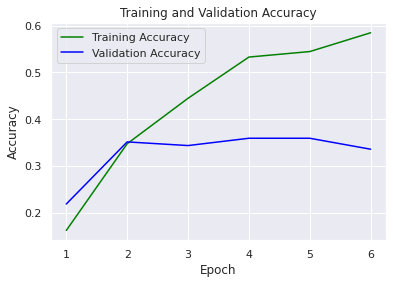

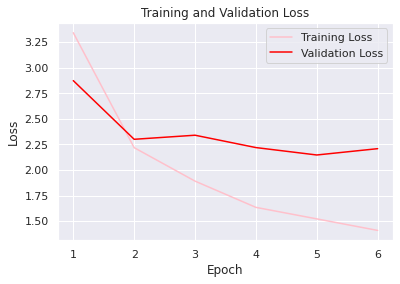

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Xception Model


**INITIALIZING THE BASE MODEL: Xception**

In [ ]:
from keras.applications import Xception

In [ ]:
base_model=Xception(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

83689472/83683744 [==============================] - 1s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(27,activation='softmax'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                2709531   
Total params: 23,571,011
Trainable params: 2,709,531
Non-trainable params: 20,861,480
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=6, validation_steps=valid_num//batch_size)

Epoch 1/6
18/18 [==============================] - 88s 5s/step - loss: 9.5750 - accuracy: 0.2052 - val_loss: 6.4635 - val_accuracy: 0.2812
Epoch 2/6
18/18 [==============================] - 88s 5s/step - loss: 4.1057 - accuracy: 0.4078 - val_loss: 3.7466 - val_accuracy: 0.4141
Epoch 3/6
18/18 [==============================] - 85s 5s/step - loss: 2.7997 - accuracy: 0.5018 - val_loss: 4.3426 - val_accuracy: 0.3516
Epoch 4/6
18/18 [==============================] - 85s 5s/step - loss: 2.3395 - accuracy: 0.5561 - val_loss: 4.3381 - val_accuracy: 0.3438
Epoch 5/6
18/18 [==============================] - 85s 5s/step - loss: 1.8107 - accuracy: 0.6252 - val_loss: 4.8120 - val_accuracy: 0.4062
Epoch 6/6
18/18 [==============================] - 85s 5s/step - loss: 1.6732 - accuracy: 0.6484 - val_loss: 4.7766 - val_accuracy: 0.4297


In [ ]:
#Saving our model
filepath="Mymodel2.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

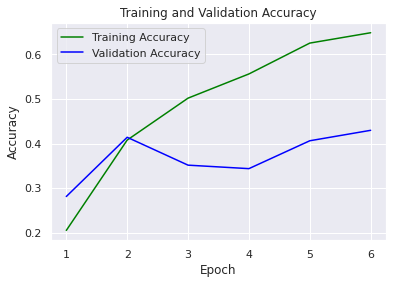

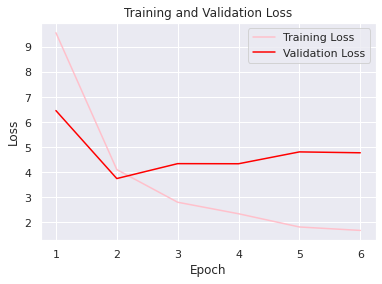

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# InceptionV3 Model

**INITIALIZING THE BASE MODEL: InceptionV3**

In [ ]:
from keras.applications import InceptionV3

In [ ]:
base_model=InceptionV3(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(27,activation='softmax'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                1382427   
Total params: 23,185,211
Trainable params: 1,382,427
Non-trainable params: 21,802,784
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=6, validation_steps=valid_num//batch_size)

Epoch 1/6
18/18 [==============================] - 81s 5s/step - loss: 31.1568 - accuracy: 0.1354 - val_loss: 17.1119 - val_accuracy: 0.1562
Epoch 2/6
18/18 [==============================] - 76s 4s/step - loss: 10.3775 - accuracy: 0.2767 - val_loss: 7.9638 - val_accuracy: 0.2500
Epoch 3/6
18/18 [==============================] - 77s 4s/step - loss: 4.0566 - accuracy: 0.4354 - val_loss: 5.2034 - val_accuracy: 0.3359
Epoch 4/6
18/18 [==============================] - 75s 4s/step - loss: 2.6709 - accuracy: 0.5226 - val_loss: 4.4249 - val_accuracy: 0.3281
Epoch 5/6
18/18 [==============================] - 79s 4s/step - loss: 2.3085 - accuracy: 0.5597 - val_loss: 3.5355 - val_accuracy: 0.4062
Epoch 6/6
18/18 [==============================] - 76s 4s/step - loss: 2.1106 - accuracy: 0.5859 - val_loss: 4.1696 - val_accuracy: 0.3672


In [ ]:
#Saving our model
filepath="Mymodel2.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

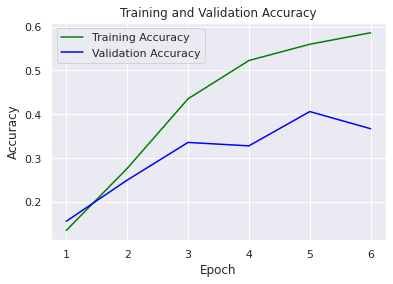

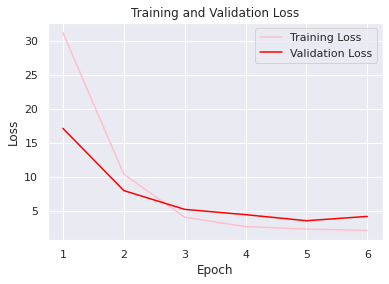

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# ResNet152 Model

**INITIALIZING THE BASE MODEL: ResNet152**

In [ ]:
from keras.applications import ResNet152

In [ ]:
base_model=ResNet152(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

234700800/234698864 [==============================] - 2s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(27,activation='softmax'))
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 27)                2709531   
Total params: 61,080,475
Trainable params: 2,709,531
Non-trainable params: 58,370,944
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=6, validation_steps=valid_num//batch_size)

Epoch 1/6
18/18 [==============================] - 86s 5s/step - loss: 14.1414 - accuracy: 0.0475 - val_loss: 12.8523 - val_accuracy: 0.0625
Epoch 2/6
18/18 [==============================] - 82s 5s/step - loss: 9.6445 - accuracy: 0.0538 - val_loss: 6.8790 - val_accuracy: 0.0859
Epoch 3/6
18/18 [==============================] - 82s 5s/step - loss: 4.5177 - accuracy: 0.0677 - val_loss: 4.3544 - val_accuracy: 0.0859
Epoch 4/6
18/18 [==============================] - 80s 4s/step - loss: 3.5618 - accuracy: 0.0972 - val_loss: 3.4492 - val_accuracy: 0.1016
Epoch 5/6
18/18 [==============================] - 81s 5s/step - loss: 3.2082 - accuracy: 0.1266 - val_loss: 3.8768 - val_accuracy: 0.0547
Epoch 6/6
18/18 [==============================] - 81s 4s/step - loss: 3.2141 - accuracy: 0.1230 - val_loss: 3.6374 - val_accuracy: 0.0859


In [ ]:
#Saving our model
filepath="Mymodel2.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

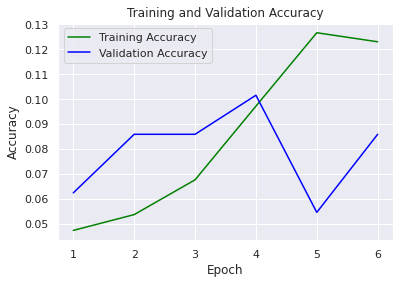

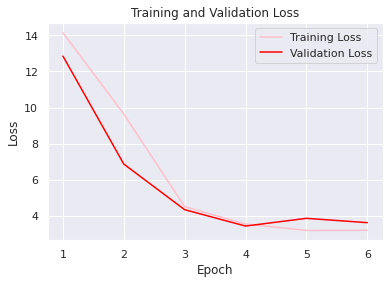

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# MoblieNetV2 Model

**INITIALIZING THE BASE MODEL: MobileNetV2**

In [ ]:
from keras.applications import MobileNetV2

In [ ]:
base_model=MobileNetV2(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

9412608/9406464 [==============================] - 0s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(27,activation='softmax'))
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_4 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 27)                1693467   
Total params: 3,951,451
Trainable params: 1,693,467
Non-trainable params: 2,257,984
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=6, validation_steps=valid_num//batch_size)

Epoch 1/6
18/18 [==============================] - 75s 4s/step - loss: 5.0789 - accuracy: 0.4995 - val_loss: 6.2358 - val_accuracy: 0.4531
Epoch 2/6
18/18 [==============================] - 76s 4s/step - loss: 2.9162 - accuracy: 0.6207 - val_loss: 6.6209 - val_accuracy: 0.3906
Epoch 3/6
18/18 [==============================] - 75s 4s/step - loss: 2.2968 - accuracy: 0.6718 - val_loss: 6.1380 - val_accuracy: 0.4922
Epoch 4/6
18/18 [==============================] - 76s 4s/step - loss: 2.0258 - accuracy: 0.7125 - val_loss: 7.2930 - val_accuracy: 0.4219
Epoch 5/6
18/18 [==============================] - 76s 4s/step - loss: 1.8015 - accuracy: 0.7333 - val_loss: 9.0080 - val_accuracy: 0.3906
Epoch 6/6
18/18 [==============================] - 77s 4s/step - loss: 1.8712 - accuracy: 0.7360 - val_loss: 8.8897 - val_accuracy: 0.3984


In [ ]:
#Saving our model
filepath="Mymodel2.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

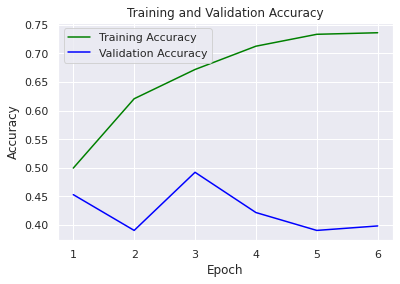

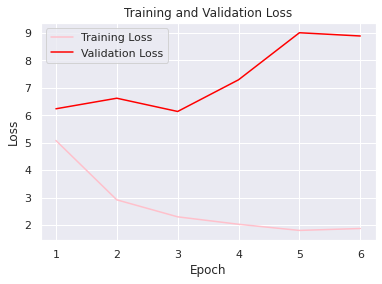

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()